# Decompose neuron connections by electrical domain

Use simple linear passive delay progragation through the neuron to determine distinct domains for representing the neuron.  The decomposition can be used to derive ROIs using electrical delay.

### Setup neuron model

* create neuprint client using the public hemibrain dataset
* build a neuron spice model for a given body id

In [1]:
# simulate a PEG neuron (same type as in hemibrain paper)
from neuprint import Client, NeuronModel
client = Client("neuprint.janelia.org", dataset="hemibrain:v1.0.1")
nm = NeuronModel(449438847)

### Simulate the delay 'distances' between parts of the neeuron

This function checks propagation delays throughout the neuron based on the number of specified points.  The points are randomly chosen even between inputs and outputs.  In principle, any points could be chosen.

In [2]:
res = nm.estimate_intra_neuron_delay(100)

### Show delay propogation closeness between simulated points

This plot should show whether there are distinct electrical domains for the neuron.  The primary ROI labels are provided to show how well the points correspond to the annotated regions.

/Users/plazas/miniconda3/envs/sim/lib/python3.8/site-packages/umap/spectral.py:227: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  warn(
/Users/plazas/miniconda3/envs/sim/lib/python3.8/site-packages/umap/spectral.py:227: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  warn(


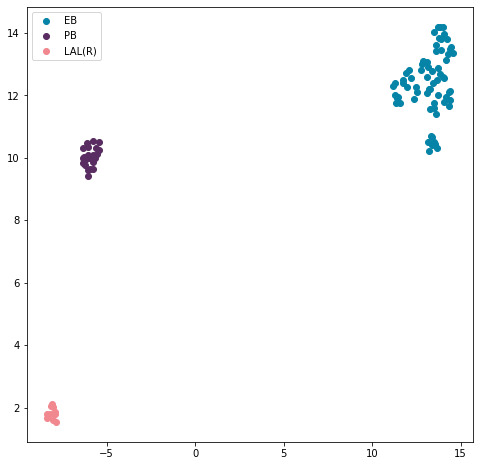

In [3]:
res.plot_neuron_domains()

### Partition the neuron into different domains based on simulated points

Cluster the simulated points and map a partition id to each synapse in the neuron.  The function returns input and output connections broken down by these domain ids. 

/Users/plazas/miniconda3/envs/sim/lib/python3.8/site-packages/umap/spectral.py:227: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  warn(
/Users/plazas/miniconda3/envs/sim/lib/python3.8/site-packages/umap/spectral.py:227: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  warn(


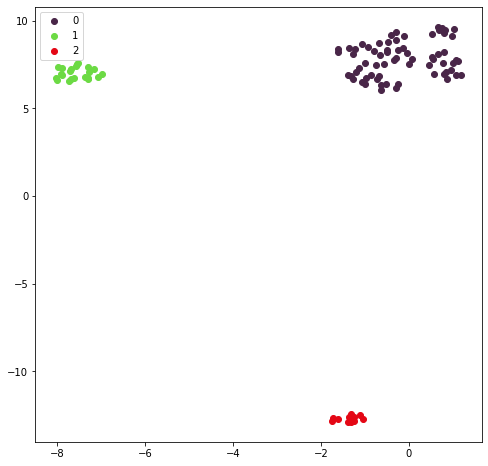

In [4]:
summary, detailed_io = res.estimate_neuron_domains(3, show_plot=True)

In [5]:
# input / output table broken down by domain id from partitioning
summary

,io,partner,weight,domain_id,rois
0,output,696682163,147,0,[EB]
1,output,974300015,97,1,"[PB, none]"
2,output,858587718,88,0,[EB]
3,output,858587718,72,2,[LAL(R)]
4,output,1228692168,66,0,[EB]
...,...,...,...,...,...
720,input,5813057963,1,0,[EB]
721,input,5813062805,1,0,[CRE(R)]
722,input,5813061383,1,1,[PB]
723,input,5813070465,1,0,[EB]


In [6]:
# domain id for each x,y,z location
detailed_io

,type,x,y,z,roi,partner,domain_id
0,post,21510,26069,20648,EB,387364605,0
1,post,23679,24857,20538,EB,387364605,0
2,post,22135,26177,20494,EB,387364605,0
3,post,21613,25974,20679,EB,387364605,0
4,post,23870,23196,20455,EB,387364605,0
...,...,...,...,...,...,...,...
7092,pre,23030,24895,20167,EB,1002507131,0
7093,pre,23621,24908,20429,EB,1002507131,0
7094,pre,22615,24507,19708,EB,1002507131,0
7095,pre,22992,24888,20123,EB,1002507131,0
